## Bending of a beam

**Adding gfdm library path**

In [1]:
import sys
sys.path.insert(0, "ADD THE PATH OF THE FOLDER WITH THE PYTHON FILES HERE")

**Import libraries**

In [2]:
import numpy as np                   # numpy module

from matplotlib import pyplot as plt # Pyplot module
plt.rc('font', size=5)               # Change General Font Size

# gfdm libraries
from elasticSolids2d import Preprocessor  # elastic solids Pre-Processor
from elasticSolids2d import Postprocessor # elastic solids Post-Processor
from gfdm2d import Mesh                   # Mesh Object

**Define simulation and material parameters**

In [3]:
# Simulation parameters
frequency           = 50 # frequency of the simulation [1/(s*e2)]
timeEnd             = 10 # End time of the simulation [s*e2]
numThreads          = 6   # num of threads used to run the simulation (should not be higher than the maximum number of cpu cores)

# Material parameters
# parameters taken for steel
# source: https://www.matweb.com/search/DataSheet.aspx?MatGUID=d1bdbccde4da4da4a9dbb8918d783b29
massDensity    = 7.83e3  # mass density  [kg/m³]
elasticModulus = 2.07e7  # elastic Modulus [Pa*e-4]
poissonRatio   = 0.3     # Poisson Ratio

# Calculate first eigen-frequency
fEigen = np.sqrt((elasticModulus*0.05**2)/(massDensity*12)) * 1/(2*np.pi) *(1.875/0.3)**2
print("The first eigen-frequency is: " + str(fEigen))

The first eigen-frequency is: 4.613853911598199


**Initialise Preprocessor**

In [4]:
prepro  = Preprocessor("beam") # Initialise preprocessor

prepro.setFrequency(frequency)           # set the simulation frequency
prepro.setTimeEnd(timeEnd)               # set the end-time of the simulation
prepro.setNumThreads(numThreads)         # set the number of threads
prepro.setMassDensity(massDensity)       # set up mass density
prepro.setElasticModulus(elasticModulus) # set up dynamic elastic modulus
prepro.setPoissonRatio(poissonRatio)     # set Poisson Ratio
#prepro.setSolverTolerance(1e-12)        # set up tolerance for iterative solver (if required)

**Import and link mesh**

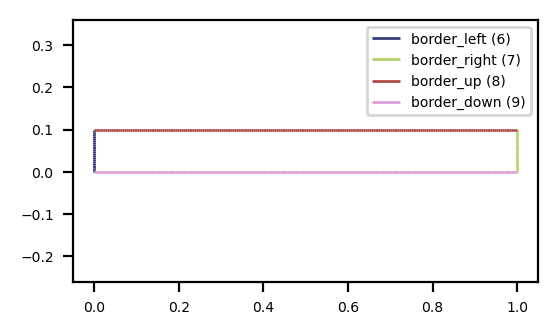

In [5]:
mesh = Mesh('beam_4860.msh') # create mesh object
prepro.linkMesh(mesh)        # Link mesh to to the preprocessor object

# Plot the boundaries
fig, ax = plt.subplots()
fig.dpi = 200
fig.set_figheight(1.7)
fig.set_figwidth(3)
#mesh.plotMesh(ax, lw=0.3)  # plot the mesh 
mesh.plotBoundary(ax, lw=1) # plot the boundaries
plt.legend()

**Set boundary conditions**

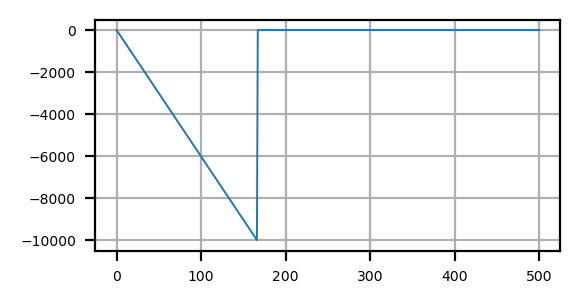

In [6]:
K = prepro.getNumTimeSteps() # number of time-steps
fmax = 1e4
# the force should increase linear up to fmax and then it should jump back to 0
force = np.zeros(K)
force[:int(K/3)] = np.linspace(0,-fmax,int(K/3)); # Applied force on the right side iof the beam


# Plot the force 
plt.figure(figsize=[3,1.5],dpi=200)
plt.plot(force,linewidth=0.7)
plt.grid()

prepro.setBoundaryCondition(physicalTag=6, boundaryType='displacement', values=[0,0]) # Fixed clamping on the left side
prepro.setBoundaryCondition(physicalTag=7, boundaryType='stress', values=[0,force])   # Applied Force
prepro.setBoundaryCondition(physicalTag=8, boundaryType='stress', values=[0,0])       # Free Surface
prepro.setBoundaryCondition(physicalTag=9, boundaryType='stress', values=[0,0])       # Free Surface

**Set initial confition**

In [7]:
prepro.setInitialCondition(vel=[0,0],stress=[0,0,0]) # velocity and stresses are 0 at the beginning 

**Run solver**

In [8]:
solverPath = "YOUR SOLVER PATH/elasticSolids2d"
prepro.setSolver(solverPath) # Set the solver path 
prepro.runSolver()           #  Run the simulation 

Solver Running...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Time needed: 101.46389174461365 seconds


**Postprocessing**

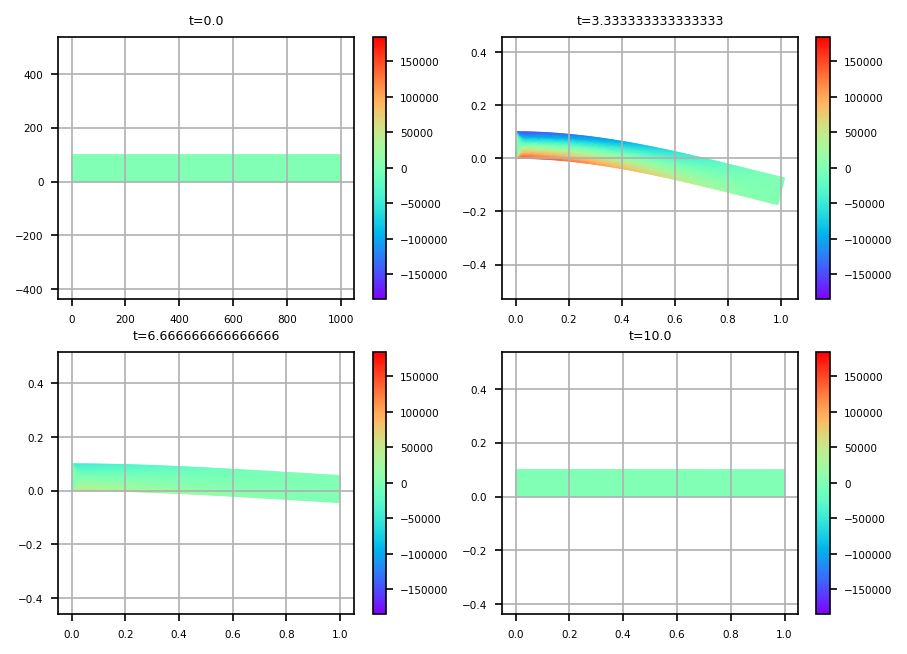

In [9]:
postpr = Postprocessor("beam") # Initialise postprocessor
postpr.linkMesh(mesh) # link mesh

# plot results
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(7,5), dpi=150)

scale = np.linspace(0,1,4) 
postpr.plotResults(fig=fig,
                   ax=ax,
                   var='sigma_yy',      # stress sigma_yy
                   tVal= scale*timeEnd, # The displacement field at 4 different time-points between 0-tEnd should be plotted 
                   colormap='rainbow')  # see https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [10]:
#create animation of the simulation results
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(3,2), dpi=200)
ax.set_facecolor('black')
postpr.triangulationPlotAnimated(fig = fig,
                                 ax = ax,
                                 var = 'mises',               # Show the Mises-stress
                                 name = "beam",               # name of the .mp4 output file
                                 colormap = "gist_rainbow_r") # see https://matplotlib.org/stable/users/explain/colors/colormaps.html

Generate Animation...
